In [4]:
import ccxt
import pandas as pd
import talib 
import vectorbt as vbt
import pandas_ta as ta

exchange = ccxt.binance()
symbol = 'BTC/USDT'
timeframe = '1h'


In [12]:
# get OHLCV 1h. 2 year focus on bear market begin at 2021-11-01 i want to create some stretegies to protect my wealth when bear market coming 
from_ts = exchange.parse8601('2021-11-01 00:00:00')
ohlcv_list = []
ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since=from_ts, limit=1000)
ohlcv_list.append(ohlcv)
while True:
    from_ts = ohlcv[-1][0]
    new_ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since=from_ts, limit=1000)
    ohlcv.extend(new_ohlcv)
    if len(new_ohlcv)!=1000:
    	break


#this section about 

In [13]:
ohlcv_list

[[[1635724800000, 61299.81, 61660.27, 61115.33, 61560.49, 1423.33658],
  [1635728400000, 61560.49, 61735.3, 61193.1, 61293.26, 1204.13616],
  [1635732000000, 61293.27, 61407.64, 60000.0, 60547.0, 3964.11113],
  [1635735600000, 60547.01, 60623.0, 59700.0, 59922.98, 2194.08802],
  [1635739200000, 59915.12, 60736.98, 59405.0, 60501.62, 2705.58541],
  [1635742800000, 60501.62, 60857.94, 60442.0, 60618.0, 1092.61492],
  [1635746400000, 60618.0, 60933.95, 60284.0, 60741.76, 1343.1546],
  [1635750000000, 60741.76, 62298.0, 60732.07, 62178.31, 5061.06921],
  [1635753600000, 62176.29, 62437.74, 61630.18, 61902.42, 2376.09917],
  [1635757200000, 61902.42, 62205.66, 61817.12, 61950.45, 1865.5236],
  [1635760800000, 61950.45, 62273.27, 61885.89, 62249.92, 1587.99662],
  [1635764400000, 62249.92, 62436.87, 61770.0, 61807.99, 2059.48952],
  [1635768000000, 61808.0, 62190.0, 61600.0, 61842.67, 2392.39038],
  [1635771600000, 61842.66, 62047.85, 61700.0, 61945.09, 1625.65186],
  [1635775200000, 61945.0

In [14]:
ohlcv_list = [[item[0], item[1], item[2], item[3], item[4], item[5]] for item in ohlcv_list[0]]

# create a DataFrame from the  list OHLCV from  2021-11-01 to 2023-03-16
df = pd.DataFrame(ohlcv_list, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])



In [15]:
df

timestamp      open      high       low     close       volume
0      1635724800000  61299.81  61660.27  61115.33  61560.49   1423.33658
1      1635728400000  61560.49  61735.30  61193.10  61293.26   1204.13616
2      1635732000000  61293.27  61407.64  60000.00  60547.00   3964.11113
3      1635735600000  60547.01  60623.00  59700.00  59922.98   2194.08802
4      1635739200000  59915.12  60736.98  59405.00  60501.62   2705.58541
...              ...       ...       ...       ...       ...          ...
12023  1678964400000  24930.23  24935.20  24724.57  24824.62  20850.03396
12024  1678968000000  24826.33  24913.35  24646.00  24720.18  25065.66573
12025  1678971600000  24720.18  24850.00  24515.23  24832.09  29466.67506
12026  1678975200000  24832.09  25032.74  24678.57  24846.64  28477.78412
12027  1678978800000  24846.64  24889.00  24752.03  24876.38  15694.77577

[12028 rows x 6 columns]

In [16]:
# let create  strategies i will use 5 ema fast and 20 ema slow cuase i wnat to reflex about 5 trading day and 20 trading month day i know crypto 7/24 but marketmaker are work m-f and some holidy but not often
df_action=df.copy()
df_action['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df_action['datetime'] = pd.to_datetime(df_action['timestamp'], unit='ms')
df_action['fast_ema'] = talib.EMA(df_action['close'].values, timeperiod=5)
df_action['slow_ema'] = talib.EMA(df_action['close'].values, timeperiod=20)
df_action['long'] = (df_action['fast_ema']> df_action['slow_ema']) & (df_action['fast_ema'].shift(1) < df_action['slow_ema'].shift(1))
df_action['short'] = (df_action['fast_ema'] < df_action['slow_ema']) & (df_action['fast_ema'].shift(1) > df_action['slow_ema'].shift(1))




In [17]:
df_action.reset_index(inplace=True)
df_action.set_index(df_action['timestamp'],inplace=True)
df_action


index           timestamp      open      high       low  \
timestamp                                                                      
2021-11-01 00:00:00      0 2021-11-01 00:00:00  61299.81  61660.27  61115.33   
2021-11-01 01:00:00      1 2021-11-01 01:00:00  61560.49  61735.30  61193.10   
2021-11-01 02:00:00      2 2021-11-01 02:00:00  61293.27  61407.64  60000.00   
2021-11-01 03:00:00      3 2021-11-01 03:00:00  60547.01  60623.00  59700.00   
2021-11-01 04:00:00      4 2021-11-01 04:00:00  59915.12  60736.98  59405.00   
...                    ...                 ...       ...       ...       ...   
2023-03-16 11:00:00  12023 2023-03-16 11:00:00  24930.23  24935.20  24724.57   
2023-03-16 12:00:00  12024 2023-03-16 12:00:00  24826.33  24913.35  24646.00   
2023-03-16 13:00:00  12025 2023-03-16 13:00:00  24720.18  24850.00  24515.23   
2023-03-16 14:00:00  12026 2023-03-16 14:00:00  24832.09  25032.74  24678.57   
2023-03-16 15:00:00  12027 2023-03-16 15:00:00  24846.64  24889.00  24752.03   

                        close       volume            datetime      fast_ema  \
timestamp                                                                      
2021-11-01 00:00:00  61560.49   1423.33658 2021-11-01 00:00:00           NaN   
2021-11-01 01:00:00  61293.26   1204.13616 2021-11-01 01:00:00           NaN   
2021-11-01 02:00:00  60547.00   3964.11113 2021-11-01 02:00:00           NaN   
2021-11-01 03:00:00  59922.98   2194.08802 2021-11-01 03:00:00           NaN   
2021-11-01 04:00:00  60501.62   2705.58541 2021-11-01 04:00:00  60765.070000   
...                       ...          ...                 ...           ...   
2023-03-16 11:00:00  24824.62  20850.03396 2023-03-16 11:00:00  24728.981749   
2023-03-16 12:00:00  24720.18  25065.66573 2023-03-16 12:00:00  24726.047832   
2023-03-16 13:00:00  24832.09  29466.67506 2023-03-16 13:00:00  24761.395222   
2023-03-16 14:00:00  24846.64  28477.78412 2023-03-16 14:00:00  24789.810148   
2023-03-16 15:00:00  24876.38  15694.77577 2023-03-16 15:00:00  24818.666765   

                         slow_ema   long  short  
timestamp                                        
2021-11-01 00:00:00           NaN  False  False  
2021-11-01 01:00:00           NaN  False  False  
2021-11-01 02:00:00           NaN  False  False  
2021-11-01 03:00:00           NaN  False  False  
2021-11-01 04:00:00           NaN  False  False  
...                           ...    ...    ...  
2023-03-16 11:00:00  24548.713326  False  False  
2023-03-16 12:00:00  24565.043485  False  False  
2023-03-16 13:00:00  24590.476487  False  False  
2023-03-16 14:00:00  24614.873012  False  False  
2023-03-16 15:00:00  24639.778439  False  False  

[12028 rows x 12 columns]

In [18]:
df_action[df_action['long']]

index           timestamp      open      high       low  \
timestamp                                                                      
2021-11-02 04:00:00     28 2021-11-02 04:00:00  61074.50  61533.00  61053.21   
2021-11-03 21:00:00     69 2021-11-03 21:00:00  62719.88  63200.00  62714.11   
2021-11-05 03:00:00     99 2021-11-05 03:00:00  61624.99  62332.04  61624.99   
2021-11-06 20:00:00    140 2021-11-06 20:00:00  61175.41  61417.12  61099.01   
2021-11-09 21:00:00    213 2021-11-09 21:00:00  67349.00  67800.27  67251.83   
...                    ...                 ...       ...       ...       ...   
2023-03-11 18:00:00  11909 2023-03-11 18:00:00  20245.48  20324.21  20197.64   
2023-03-15 01:00:00  11988 2023-03-15 01:00:00  24722.48  25074.24  24650.40   
2023-03-15 07:00:00  11994 2023-03-15 07:00:00  24780.59  24918.59  24711.50   
2023-03-15 13:00:00  12001 2023-03-15 13:00:00  24808.12  25128.00  24708.89   
2023-03-16 07:00:00  12019 2023-03-16 07:00:00  24568.76  24685.00  24527.51   

                        close       volume            datetime      fast_ema  \
timestamp                                                                      
2021-11-02 04:00:00  61412.01   1172.02844 2021-11-02 04:00:00  61161.528457   
2021-11-03 21:00:00  63107.71   1294.17375 2021-11-03 21:00:00  62825.134948   
2021-11-05 03:00:00  62203.80   1556.07190 2021-11-05 03:00:00  61698.155316   
2021-11-06 20:00:00  61146.27   1195.69420 2021-11-06 20:00:00  60943.212722   
2021-11-09 21:00:00  67721.00   1596.26353 2021-11-09 21:00:00  67248.347606   
...                       ...          ...                 ...           ...   
2023-03-11 18:00:00  20226.72  16153.81836 2023-03-11 18:00:00  20167.240428   
2023-03-15 01:00:00  24906.01  24210.48624 2023-03-15 01:00:00  24805.468393   
2023-03-15 07:00:00  24871.28  12666.06354 2023-03-15 07:00:00  24801.170010   
2023-03-15 13:00:00  24777.01  44198.31413 2023-03-15 13:00:00  24759.917353   
2023-03-16 07:00:00  24614.27  17665.10824 2023-03-16 07:00:00  24468.207603   

                         slow_ema  long  short  
timestamp                                       
2021-11-02 04:00:00  61149.875321  True  False  
2021-11-03 21:00:00  62745.826326  True  False  
2021-11-05 03:00:00  61609.401744  True  False  
2021-11-06 20:00:00  60877.852466  True  False  
2021-11-09 21:00:00  67191.927408  True  False  
...                           ...   ...    ...  
2023-03-11 18:00:00  20146.489118  True  False  
2023-03-15 01:00:00  24797.341983  True  False  
2023-03-15 07:00:00  24792.306930  True  False  
2023-03-15 13:00:00  24756.682015  True  False  
2023-03-16 07:00:00  24444.292175  True  False  

[372 rows x 12 columns]

In [19]:
df_action[df_action['short']]

index           timestamp      open      high       low  \
timestamp                                                                      
2021-11-03 12:00:00     60 2021-11-03 12:00:00  63107.29  63133.99  62226.19   
2021-11-04 01:00:00     73 2021-11-04 01:00:00  62829.56  62845.20  62254.01   
2021-11-05 11:00:00    107 2021-11-05 11:00:00  61573.00  61839.95  61191.28   
2021-11-09 16:00:00    208 2021-11-09 16:00:00  66771.11  67006.61  66422.40   
2021-11-09 23:00:00    215 2021-11-09 23:00:00  67292.72  67436.94  66736.23   
...                    ...                 ...       ...       ...       ...   
2023-03-11 07:00:00  11898 2023-03-11 07:00:00  20283.90  20320.77  19823.82   
2023-03-14 23:00:00  11986 2023-03-14 23:00:00  24698.39  24777.87  24603.43   
2023-03-15 03:00:00  11990 2023-03-15 03:00:00  24826.90  24855.00  24642.63   
2023-03-15 08:00:00  11995 2023-03-15 08:00:00  24872.54  24922.22  24750.41   
2023-03-15 14:00:00  12002 2023-03-15 14:00:00  24777.01  24952.35  24429.64   

                        close       volume            datetime      fast_ema  \
timestamp                                                                      
2021-11-03 12:00:00  62470.01   3117.32263 2021-11-03 12:00:00  62905.732088   
2021-11-04 01:00:00  62331.96   1713.93066 2021-11-04 01:00:00  62669.269619   
2021-11-05 11:00:00  61259.63   1947.15429 2021-11-05 11:00:00  61643.352600   
2021-11-09 16:00:00  66693.00   2498.45731 2021-11-09 16:00:00  67151.319010   
2021-11-09 23:00:00  66947.66    971.37090 2021-11-09 23:00:00  67157.978936   
...                       ...          ...                 ...           ...   
2023-03-11 07:00:00  19850.81  31787.51955 2023-03-11 07:00:00  20176.764775   
2023-03-14 23:00:00  24670.41  17644.62904 2023-03-14 23:00:00  24772.766385   
2023-03-15 03:00:00  24717.65  13187.88115 2023-03-15 03:00:00  24781.178175   
2023-03-15 08:00:00  24754.70  15040.58315 2023-03-15 08:00:00  24785.680007   
2023-03-15 14:00:00  24706.61  41650.01841 2023-03-15 14:00:00  24742.148235   

                         slow_ema   long  short  
timestamp                                        
2021-11-03 12:00:00  62975.213359  False   True  
2021-11-04 01:00:00  62728.803358  False   True  
2021-11-05 11:00:00  61739.082265  False   True  
2021-11-09 16:00:00  67255.177635  False   True  
2021-11-09 23:00:00  67177.348921  False   True  
...                           ...    ...    ...  
2023-03-11 07:00:00  20201.650987  False   True  
2023-03-14 23:00:00  24792.834112  False   True  
2023-03-15 03:00:00  24792.384526  False   True  
2023-03-15 08:00:00  24788.725317  False   True  
2023-03-15 14:00:00  24751.913252  False   True  

[371 rows x 12 columns]

In [20]:
Entry=df_action['long']
Entry_short = df_action['short']

In [27]:
Entry_short[Entry_short==True]

timestamp
2021-11-03 12:00:00    True
2021-11-04 01:00:00    True
2021-11-05 11:00:00    True
2021-11-09 16:00:00    True
2021-11-09 23:00:00    True
                       ... 
2023-03-11 07:00:00    True
2023-03-14 23:00:00    True
2023-03-15 03:00:00    True
2023-03-15 08:00:00    True
2023-03-15 14:00:00    True
Name: short, Length: 371, dtype: bool

In [21]:
Long_signal_vectorbt=ta.tsignals(Entry,asbool=True,append=True)
Short_signal_vectorbt=ta.tsignals(Entry_short,asbool=True,append=True)


In [31]:
Long_signal_vectorbt[Long_signal_vectorbt['TS_Trades']==True]

TS_Trends  TS_Trades  TS_Entries  TS_Exits
timestamp                                                      
2021-11-02 04:00:00       True          1        True     False
2021-11-03 21:00:00       True          1        True     False
2021-11-05 03:00:00       True          1        True     False
2021-11-06 20:00:00       True          1        True     False
2021-11-09 21:00:00       True          1        True     False
...                        ...        ...         ...       ...
2023-03-11 18:00:00       True          1        True     False
2023-03-15 01:00:00       True          1        True     False
2023-03-15 07:00:00       True          1        True     False
2023-03-15 13:00:00       True          1        True     False
2023-03-16 07:00:00       True          1        True     False

[372 rows x 4 columns]

In [30]:
Short_signal_vectorbt[Short_signal_vectorbt['TS_Trades']==True]

TS_Trends  TS_Trades  TS_Entries  TS_Exits
timestamp                                                      
2021-11-03 12:00:00       True          1        True     False
2021-11-04 01:00:00       True          1        True     False
2021-11-05 11:00:00       True          1        True     False
2021-11-09 16:00:00       True          1        True     False
2021-11-09 23:00:00       True          1        True     False
...                        ...        ...         ...       ...
2023-03-11 07:00:00       True          1        True     False
2023-03-14 23:00:00       True          1        True     False
2023-03-15 03:00:00       True          1        True     False
2023-03-15 08:00:00       True          1        True     False
2023-03-15 14:00:00       True          1        True     False

[371 rows x 4 columns]

/var/folders/0j/079zvm2s3dxclvzgz86_k33m0000gn/T/ipykernel_66471/3351304440.py:2: UserWarning:

direction has no effect if short_entries and short_exits are set



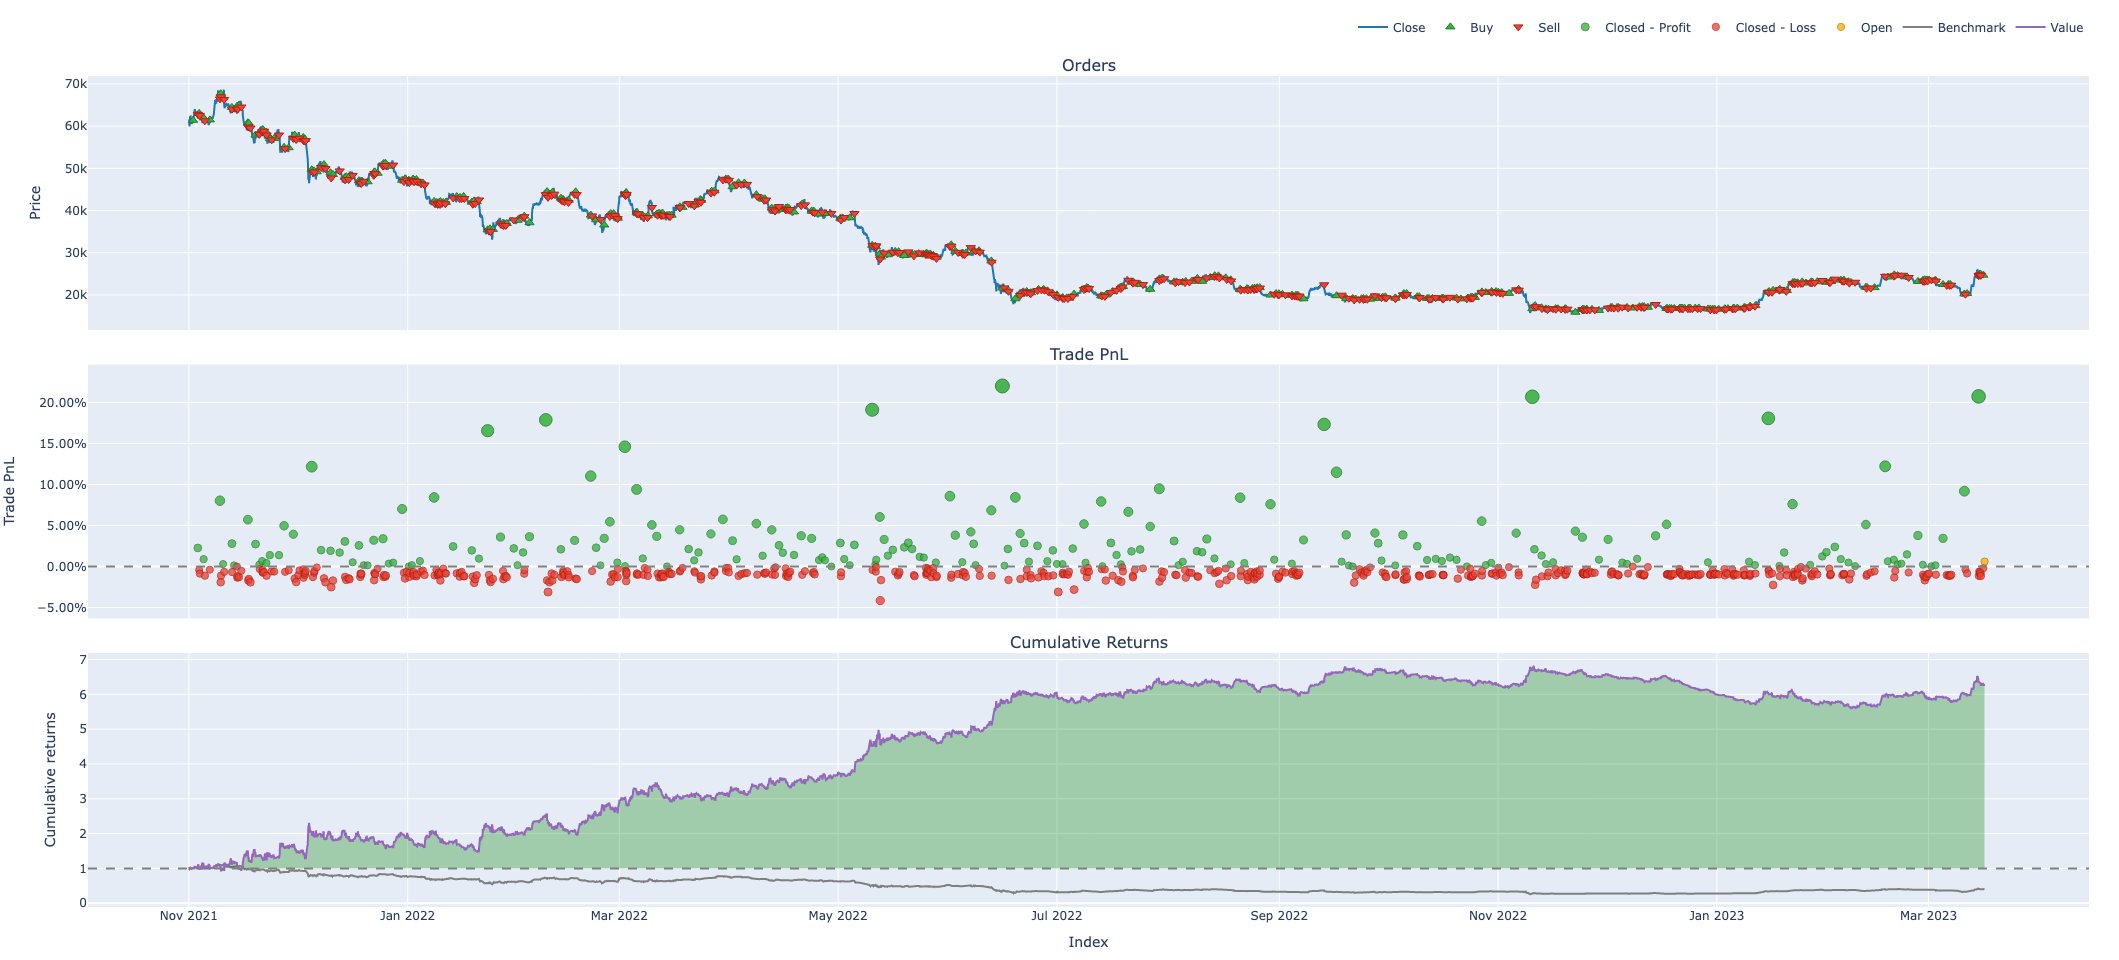

In [34]:
#Long & Short 2 way (Long and Short Open freely) add slipage and fees reflex on trading on binance fee usdt = 0.02% 
port = vbt.Portfolio.from_signals(df.open,
                                entries = Long_signal_vectorbt.TS_Entries, # Long Entry
                                short_entries = Short_signal_vectorbt.TS_Entries, #Short Entry
                                freq = '1h',
                                init_cash = 1000,
                                size=0.1,
                                #tp_stop=0.09,
                                #sl_stop=0.025,
                                fees = 0.0002,
                                direction=2,
                               slippage = 0.005
                                 )
port.plot().show()

In [23]:
port.stats()

Start                               2021-11-01 00:00:00
End                                 2023-03-16 15:00:00
Period                                501 days 04:00:00
Start Value                                      1000.0
End Value                                   6275.571761
Total Return [%]                             527.557176
Benchmark Return [%]                          -59.46702
Max Gross Exposure [%]                     18793.390026
Total Fees Paid                              777.721078
Max Drawdown [%]                              36.383645
Max Drawdown Duration                 125 days 21:00:00
Total Trades                                        743
Total Closed Trades                                 742
Total Open Trades                                     1
Open Trade PnL                                15.009788
Win Rate [%]                                  27.628032
Best Trade [%]                                 22.00648
Worst Trade [%]                               -4

In [24]:
port.cumulative_returns()

timestamp
2021-11-01 00:00:00    0.000000
2021-11-01 01:00:00    0.000000
2021-11-01 02:00:00    0.000000
2021-11-01 03:00:00    0.000000
2021-11-01 04:00:00    0.000000
                         ...   
2023-03-16 11:00:00    5.283931
2023-03-16 12:00:00    5.273541
2023-03-16 13:00:00    5.262926
2023-03-16 14:00:00    5.274117
2023-03-16 15:00:00    5.275572
Length: 12028, dtype: float64

In [ ]:
trade_log = port.trades.records_readable
trade_log

Exit Trade Id  Column      Size     Entry Timestamp  Avg Entry Price  \
0                0       0  0.016289 2021-11-02 04:00:00      61379.87250   
1                1       0  0.100000 2021-11-03 12:00:00      62791.75355   
2                2       0  0.015796 2021-11-03 21:00:00      63033.47940   
3                3       0  0.100000 2021-11-04 01:00:00      62515.41220   
4                4       0  0.016838 2021-11-05 03:00:00      61933.11495   
..             ...     ...       ...                 ...              ...   
738            738       0  0.100000 2023-03-15 07:00:00      24904.49295   
739            739       0  0.100000 2023-03-15 08:00:00      24748.17730   
740            740       0  0.100000 2023-03-15 13:00:00      24932.16060   
741            741       0  0.100000 2023-03-15 14:00:00      24653.12495   
742            742       0  0.100000 2023-03-16 07:00:00      24691.60380   

     Entry Fees      Exit Timestamp  Avg Exit Price  Exit Fees        PnL  \
0      0.199960 2021-11-03 12:00:00     62791.75355   0.204560  22.593227   
1      1.255835 2021-11-03 21:00:00     63033.47940   1.260670 -26.689090   
2      0.199141 2021-11-04 01:00:00     62515.41220   0.197504  -8.580266   
3      1.250308 2021-11-05 03:00:00     61933.11495   1.238662  55.740754   
4      0.208571 2021-11-05 11:00:00     61265.13500   0.206322 -11.662623   
..          ...                 ...             ...        ...        ...   
738    0.498090 2023-03-15 08:00:00     24748.17730   0.494964 -16.624618   
739    0.494964 2023-03-15 13:00:00     24932.16060   0.498643 -19.391937   
740    0.498643 2023-03-15 14:00:00     24653.12495   0.493062 -28.895271   
741    0.493062 2023-03-16 07:00:00     24691.60380   0.493832  -4.834780   
742    0.493832 2023-03-16 15:00:00     24846.64000   0.000000  15.009788   

       Return Direction  Status  Position Id  
0    0.022598      Long  Closed            0  
1   -0.004250     Short  Closed            1  
2   -0.008617      Long  Closed            2  
3    0.008916     Short  Closed            3  
4   -0.011183      Long  Closed            4  
..        ...       ...     ...          ...  
738 -0.006675      Long  Closed          738  
739 -0.007836     Short  Closed          739  
740 -0.011590      Long  Closed          740  
741 -0.001961     Short  Closed          741  
742  0.006079      Long    Open          742  

[743 rows x 14 columns]